In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df=pd.read_csv('MyDataset.csv')
df.head()

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp


# Data Preprocessing

In [3]:
df.duplicated().sum()

1100

In [4]:
df=df.drop_duplicates()
df

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp
...,...,...,...,...,...,...,...,...,...,...
115292,12/30/2023 11:51,699,5.177,764,2680,idle,Backdoor,host-attack,attack,any
115293,12/30/2023 11:51,484,5.201,487,2500,idle,Backdoor,host-attack,attack,any
115294,12/30/2023 11:51,477,5.197,567,2860,idle,Backdoor,host-attack,attack,any
115295,12/30/2023 11:51,510,5.197,509,2660,idle,Backdoor,host-attack,attack,any


In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

time             1995
shunt_voltage     750
bus_voltage_V      23
current_mA        751
power_mW          124
State               2
Attack              7
Attack-Group        4
Label               2
interface           3
dtype: int64

In [7]:
df['shunt_voltage'].unique()

array([ 978,  872, 1017,  930,  958,  935,  948,  960,  928,  844,  843,
        968,  831,  719,  781,  646,  683,  498,  495,  814,  919,  905,
        929,  943,  916,  839,  820,  961,  898,  989,  836,  934,  878,
        936,  901,  893,  939,  785, 1013,  867, 1114,  880,  805,  725,
        778,  648,  533,  492,  623,  911,  949,  975, 1023,  988,  952,
        854,  947,  899, 1041,  914, 1015,  896, 1031,  998,  882,  853,
        904,  889, 1018,  999,  891,  982,  910,  819,  769,  817,  674,
        602,  693,  888,  866, 1002,  970, 1021,  909,  980,  953,  983,
        972,  976,  862,  938,  937, 1032,  886,  951,  750,  994,  501,
        627,  499,  526,  622,  892,  855,  902,  923, 1014,  897,  974,
       1019,  821,  924,  954,  858,  996,  890, 1007,  979,  753,  801,
        645,  620,  761,  564,  860, 1029, 1067,  906, 1045, 1026,  965,
        957,  967,  941,  798,  864,  925,  788,  987,  865,  945,  883,
        922,  754,  568,  660,  497,  649,  530,  7

In [8]:
df['Label'].value_counts()

attack    99898
benign    14300
Name: Label, dtype: int64

In [9]:
df['Attack-Group'].value_counts()

DoS            34496
recon          32717
host-attack    32685
none           14300
Name: Attack-Group, dtype: int64

In [10]:
df['Attack-Group']=df['Attack-Group'].str.replace('none','Benign',case=False)

In [11]:
df['Attack-Group'].value_counts()

DoS            34496
recon          32717
host-attack    32685
Benign         14300
Name: Attack-Group, dtype: int64

In [12]:
df['interface'].value_counts()

ocpp    67213
any     32685
none    14300
Name: interface, dtype: int64

# Data Visualisation

In [13]:
df.corr()

,shunt_voltage,bus_voltage_V,current_mA,power_mW
shunt_voltage,1.000000,-0.955147,0.935079,0.926329
bus_voltage_V,-0.955147,1.000000,-0.947521,-0.940558
current_mA,0.935079,-0.947521,1.000000,0.963560
power_mW,0.926329,-0.940558,0.963560,1.000000


<Axes: >

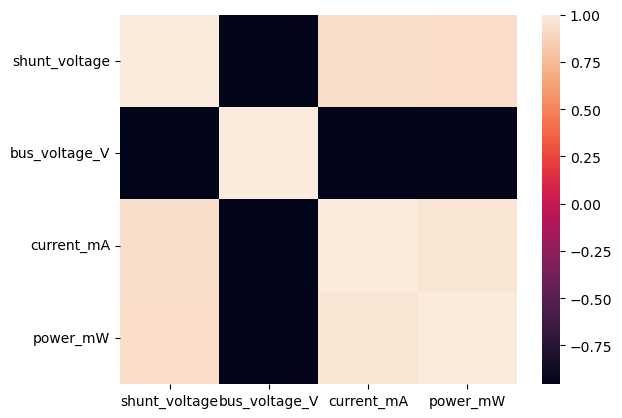

In [14]:
import seaborn as sns
sns.heatmap(df.corr())

In [15]:
df.columns

Index(['time', 'shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW',
       'State', 'Attack', 'Attack-Group', 'Label', 'interface'],
      dtype='object')

In [16]:
df['State'].value_counts()

idle        84606
charging    29592
Name: State, dtype: int64

In [17]:
status_mapping={'idle':0,'charging':1}
df['State']=df['State'].map(status_mapping)

In [18]:
independent_columns=['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW',
       'State']

In [19]:
X=df[independent_columns]

In [20]:
y=df['Attack-Group']

In [21]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
df.isnull().sum()

time             0
shunt_voltage    0
bus_voltage_V    0
current_mA       0
power_mW         0
State            0
Attack           0
Attack-Group     0
Label            0
interface        0
dtype: int64

In [23]:
X.isnull().sum()

shunt_voltage    0
bus_voltage_V    0
current_mA       0
power_mW         0
State            0
dtype: int64

# Data Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_clf.predict(X_test)


In [26]:
import time
start_time = time.time()
y_pred = adaboost_clf.predict(X_test)
end_time = time.time()
prediction = end_time-start_time
print("Predition Time:",prediction)

Predition Time: 0.6177539825439453


In [27]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6589184312476782


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score, classification_report
acc = accuracy_score(y_test ,  y_pred)
print('Accuracy:', acc)
prec = precision_score(y_test, y_pred, average=None)
print('Precision:', prec)
rec = recall_score(y_test, y_pred, average=None)
print('Recall:', rec)
f1 = f1_score(y_test,y_pred, average=None)
print('F1 Score:',f1)
print('classification_report: ')
print(classification_report(y_test, y_pred))

Accuracy: 0.6589184312476782
Precision: [0.81970128 0.73570432 0.72283315 0.56620615]
Recall: [0.48292479 0.37111951 0.78480775 0.9132508 ]
F1 Score: [0.60777851 0.49336529 0.75254665 0.69902436]
classification_report: 
              precision    recall  f1-score   support

      Benign       0.82      0.48      0.61      4773
         DoS       0.74      0.37      0.49     11371
 host-attack       0.72      0.78      0.75     10637
       recon       0.57      0.91      0.70     10905

    accuracy                           0.66     37686
   macro avg       0.71      0.64      0.64     37686
weighted avg       0.69      0.66      0.64     37686



In [29]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

num_classes = len(np.unique(y_test))  # Get the number of unique classes in y_test
if num_classes == 4 and conf_matrix.shape == (4, 4):
    # Compute FAR for each class
    false_acceptances = conf_matrix[:, 1]  # False acceptances for each class
    total_attempts = np.sum(conf_matrix[:, :], axis=1)  # Total number of verification attempts for each class
    far = (false_acceptances / total_attempts) * 100  # FAR for each class in percentage

    print("False Acceptance Rate (FAR) for each class:")
    for i in range(4):  # Assuming you have 4 classes
        print(f"Class {i}: {far[i]}%")

else:
    print("Error: Confusion matrix dimensions do not match the expected 4x4 shape for four-class classification.")

False Acceptance Rate (FAR) for each class:
Class 0: 0.5866331447726797%
Class 1: 37.11195145545687%
Class 2: 12.296700197424085%
Class 3: 1.6506189821182942%


In [30]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2305   28 2175  265]
 [  97 4220  451 6603]
 [ 219 1308 8348  762]
 [ 191  180  575 9959]]


# Random Search

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import uniform, randint
import time

# Initialize base estimator (e.g., DecisionTreeClassifier with max_depth)
base_estimator = DecisionTreeClassifier(max_depth=3)  # Reduced max_depth for faster training

# Initialize AdaBoostClassifier with base_estimator
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define parameter grid with further reduced ranges
param_dist = {
    'learning_rate': uniform(0.01, 0.05),  # Further reduced range for learning_rate
    'n_estimators': randint(100, 300),  # Further reduced range for n_estimators
}

# Define RandomizedSearchCV with optimized settings
random_search = RandomizedSearchCV(
    estimator=adaboost_clf,
    param_distributions=param_dist,
    n_iter=20,  # Further reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='accuracy',  # Using accuracy as a simpler scoring metric
    random_state=42,
    verbose=2,
    n_jobs=-1,  # Utilize all available CPU cores for parallel processing
)

# Fit RandomizedSearchCV and measure execution time
start_time = time.time()
random_search.fit(X_train[:1000], y_train[:1000])  # Using a subset of training data for faster tuning
end_time = time.time()

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print(f"RandomizedSearchCV took {end_time - start_time:.2f} seconds to complete.")

# Evaluate the best model on the test set
best_clf = random_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.01035331526098587, 'n_estimators': 188}
RandomizedSearchCV took 48.90 seconds to complete.
Test Accuracy: 63.67%


In [37]:
import time
start_time = time.time()
y_pred = best_model.predict(X_test)
end_time = time.time()
prediction = end_time-start_time
print("Predition Time:",prediction)

Predition Time: 0.90903639793396


In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score, classification_report
acc = accuracy_score(y_test ,  y_pred)
print('Accuracy:', acc)
prec = precision_score(y_test, y_pred, average=None),mn
print('Precision:', prec)
rec = recall_score(y_test, y_pred, average=None)
print('Recall:', rec)
f1 = f1_score(y_test,y_pred, average=None)
print('F1 Score:',f1)
print('classification_report: ')
print(classification_report(y_test, y_pred))

Accuracy: 0.6674892533036141
Precision: [0.84232057 0.82251742 0.72510348 0.56287326]
Recall: [0.47454431 0.33216076 0.83989847 0.93342503]
F1 Score: [0.60707585 0.47321932 0.77829079 0.70226638]
classification_report: 
              precision    recall  f1-score   support

      Benign       0.84      0.47      0.61      4773
         DoS       0.82      0.33      0.47     11371
 host-attack       0.73      0.84      0.78     10637
       recon       0.56      0.93      0.70     10905

    accuracy                           0.67     37686
   macro avg       0.74      0.65      0.64     37686
weighted avg       0.72      0.67      0.64     37686



In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

num_classes = len(np.unique(y_test))  # Get the number of unique classes in y_test
if num_classes == 4 and conf_matrix.shape == (4, 4):
    # Compute FAR for each class
    false_acceptances = conf_matrix[:, 1]  # False acceptances for each class
    total_attempts = np.sum(conf_matrix[:, :], axis=1)  # Total number of verification attempts for each class
    far = (false_acceptances / total_attempts) * 100  # FAR for each class in percentage

    print("False Acceptance Rate (FAR) for each class:")
    for i in range(4):  # Assuming you have 4 classes
        print(f"Class {i}: {far[i]}%")

else:
    print("Error: Confusion matrix dimensions do not match the expected 4x4 shape for four-class classification.")

False Acceptance Rate (FAR) for each class:
Class 0: 0.23046302116069556%
Class 1: 33.21607598276317%
Class 2: 6.402181066090062%
Class 3: 1.1279229711141678%


In [40]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 2265    11  2148   349]
 [   76  3777   793  6725]
 [  191   681  8934   831]
 [  157   123   446 10179]]


# Baye's Search

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the parameter search space
param_space = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
}

# Initialize AdaBoost classifier
ada_boost = AdaBoostClassifier()

# Define Bayesian optimization
bayes_search = BayesSearchCV(
    ada_boost,
    param_space,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1   # Controls the verbosity
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", bayes_search.best_params_)

# Evaluate the best model
best_model = bayes_search.best_estimator_
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", cross_val_scores.mean())

# Finally, fit the best model to the full training data
best_model.fit(X_train, y_train)


In [33]:
import time
start_time = time.time()
y_pred = best_model.predict(X_test)
end_time = time.time()
prediction = end_time-start_time
print("Predition Time:",prediction)

Predition Time: 0.9111731052398682


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score, classification_report
acc = accuracy_score(y_test ,  y_pred)
print('Accuracy:', acc)
prec = precision_score(y_test, y_pred, average=None)
print('Precision:', prec)
rec = recall_score(y_test, y_pred, average=None)
print('Recall:', rec)
f1 = f1_score(y_test,y_pred, average=None)
print('F1 Score:',f1)
print('classification_report: ')
print(classification_report(y_test, y_pred))

Accuracy: 0.6674892533036141
Precision: [0.84232057 0.82251742 0.72510348 0.56287326]
Recall: [0.47454431 0.33216076 0.83989847 0.93342503]
F1 Score: [0.60707585 0.47321932 0.77829079 0.70226638]
classification_report: 
              precision    recall  f1-score   support

      Benign       0.84      0.47      0.61      4773
         DoS       0.82      0.33      0.47     11371
 host-attack       0.73      0.84      0.78     10637
       recon       0.56      0.93      0.70     10905

    accuracy                           0.67     37686
   macro avg       0.74      0.65      0.64     37686
weighted avg       0.72      0.67      0.64     37686



In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

num_classes = len(np.unique(y_test))  # Get the number of unique classes in y_test
if num_classes == 4 and conf_matrix.shape == (4, 4):
    # Compute FAR for each class
    false_acceptances = conf_matrix[:, 1]  # False acceptances for each class
    total_attempts = np.sum(conf_matrix[:, :], axis=1)  # Total number of verification attempts for each class
    far = (false_acceptances / total_attempts) * 100  # FAR for each class in percentage

    print("False Acceptance Rate (FAR) for each class:")
    for i in range(4):  # Assuming you have 4 classes
        print(f"Class {i}: {far[i]}%")

else:
    print("Error: Confusion matrix dimensions do not match the expected 4x4 shape for four-class classification.")

False Acceptance Rate (FAR) for each class:
Class 0: 0.23046302116069556%
Class 1: 33.21607598276317%
Class 2: 6.402181066090062%
Class 3: 1.1279229711141678%


In [36]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 2265    11  2148   349]
 [   76  3777   793  6725]
 [  191   681  8934   831]
 [  157   123   446 10179]]
